In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [11]:
networkYolo = cv.dnn.readNetFromDarknet(r'yolo.cnf', r'yolo.weights')
image_input = cv.imread(r'images.jpg')

blobImage = cv.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True)
networkYolo.setInput(blobImage)
output_layers_name=networkYolo.getUnconnectedOutLayersNames()
Outputs=networkYolo.forward(output_layers_name)

In [12]:
boxes, accuracies, name_ids =[],[],[]
height, width = image_input.shape[:2]
for out in Outputs:
    for item in out:
        score=item[5:]
        name_id=np.argmax(score)
        accuracy=score[name_id]
        if accuracy>0.7:
            x_cent=item[0]*width
            y_cent=item[1]*height
            w_box=int(item[2]*width)
            h_box=int(item[3]*height)
            x_box=int(x_cent-w_box/2)
            y_box=int(y_cent-h_box/2)
            boxes.append([x_box,y_box,w_box,h_box])
            accuracies.append(accuracy)
            name_ids.append(name_id)

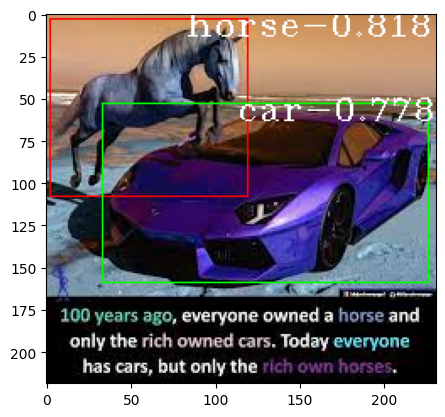

In [13]:
idxs=cv.dnn.NMSBoxes(boxes,accuracies,0.5,0.5)
RGB=[[255,0,0],[0,255,0],[0,0,255]]
white = (255,255,255)
with open(r'coco.names','r') as f:
    names=f.read().splitlines()
for idx in idxs:
    x_box,y_box,w_box,h_box=boxes[idx]
    final_accuracy=str(round(accuracies[idx],3))
    cv.rectangle(image_input,(x_box,y_box),(x_box+w_box,y_box+h_box),RGB[idx])
    cv.putText(image_input,
               names[name_ids[idx]]+"-"+final_accuracy, #text
               (x_box+80,y_box+10), #position
               cv.FONT_HERSHEY_COMPLEX_SMALL, #font
               1, #size
               white) #color
plt.imshow(image_input)